In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors

/Users/thanasi/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import os
import fnmatch
import numpy as np
import pandas as pd
import scipy as sp
import palettable as pbl
import h5py

from isanaht import plot_helper as ph

In [3]:
cmap7 = pbl.colorbrewer.get_map('Set1', 'Qualitative', 7)
cmap11 = pbl.colorbrewer.get_map('Paired', 'Qualitative', 12)
c11s = cmap11.hex_colors
c11s = c11s[1::2] + c11s[::2] # unpair them

In [4]:
mpl.rc('image', cmap='coolwarm', interpolation='nearest')
mpl.rc('font', family='STIXGeneral')
mpl.rc('legend', fancybox=False, numpoints=1, markerscale=1.5, borderaxespad=0.5, fontsize=16)
mpl.rc('figure', figsize=(8,8))
mpl.rc('axes', linewidth=1.5, edgecolor='k', labelsize=22, grid=False, axisbelow=True,
        prop_cycle= mpl.cycler(color=c11s))
mpl.rc('grid', linewidth=1)
mpl.rc('ytick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('lines', linewidth=2)

In [5]:
def get_pos_finite(arr):
    a = arr[np.isfinite(arr)]
    return arr[arr>0]

def gaussian(xs, mean, s):
    return np.exp( (xs-mean)**2 / (2*s**2 ))

---

## Unperturbed Band Structure 

In [6]:
output_dir = './out/holes/bands/multi-k/'

In [7]:
eps_lo = 1
eps_hi = 12
omega0 = 0.25
lmbda0 = 2*np.pi / omega0
lmbda_hi = lmbda0 / eps_hi
res = 30

sx = 1
sy = 8

print(res/lmbda_hi, "px/wavelength")

14.323944878270582 px/wavelength


In [10]:
X_max = sx / 2
X_min = - X_max
Y_max = sy / 2
Y_min =  - Y_max


with h5py.File(output_dir + 'eps.h5', 'r') as eps_file:
    epsilon = eps_file["eps"].value.T
    nX = epsilon.shape[1]
    X = np.mgrid[-X_max:X_max:1j*nX]

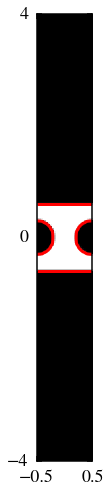

In [11]:
fig,ax = plt.subplots()
ax.imshow(epsilon, extent=(X_min,X_max, Y_min, Y_max), cmap=plt.cm.gray);
ax.contour(epsilon, [5], extent=(X_min, X_max, Y_min, Y_max), colors='r', linewidths=3);
ax.set_aspect('equal');
ax.set_xticks([X_min, X_max]);
ax.set_yticks([Y_min, 0, Y_max]);

In [12]:
freqs_re = pd.read_csv(output_dir + 'fre.out', header=None, index_col=0, usecols=range(2,10))
freqs_im = pd.read_csv(output_dir + 'fim.out', header=None, index_col=0, usecols=range(2,10))

In [13]:
freqs_re.index

Float64Index([             0.0, 0.00980392156863,  0.0196078431373,
               0.0294117647059,  0.0392156862745,  0.0490196078431,
               0.0588235294118,  0.0686274509804,   0.078431372549,
               0.0882352941176,  0.0980392156863,   0.107843137255,
                0.117647058824,   0.127450980392,   0.137254901961,
                0.147058823529,   0.156862745098,   0.166666666667,
                0.176470588235,   0.186274509804,   0.196078431373,
                0.205882352941,    0.21568627451,   0.225490196078,
                0.235294117647,   0.245098039216,   0.254901960784,
                0.264705882353,   0.274509803922,    0.28431372549,
                0.294117647059,   0.303921568627,   0.313725490196,
                0.323529411765,   0.333333333333,   0.343137254902,
                0.352941176471,   0.362745098039,   0.372549019608,
                0.382352941176,   0.392156862745,   0.401960784314,
                0.411764705882,   0.421568627451

In [14]:
get_pos_finite(freqs_re.loc[0.0].values)

array([ 0.37300415,  0.43429625])

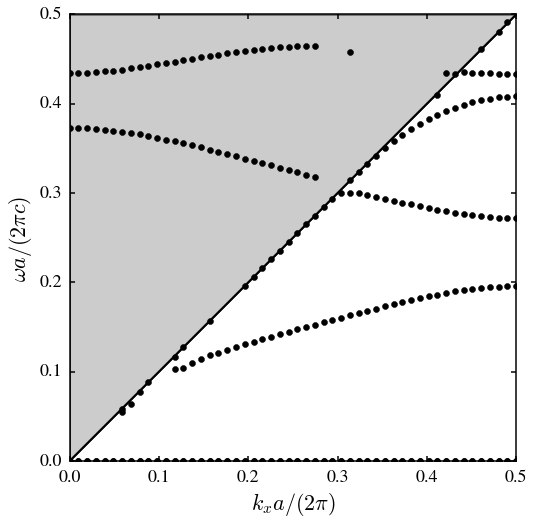

In [15]:
fig,ax = plt.subplots()
freqs_re.plot(ax=ax, c='k', marker='o', linestyle='', legend=None);
k0 = [0,0.5]
ax.plot(k0,k0,c='k');
ax.fill_betweenx(k0, k0, facecolor='#cccccc', zorder=-1);
# ax.axhline(0.4528543062578309, c='k', lw=3)
ax.set_xlabel("$k_x a / (2 \pi)$");
ax.set_ylabel("$\omega a / (2 \pi c)$");

---

## Time-Domain Analysis of Radiating Modes

In [16]:
output_dir = './out/holes/radiation/'

In [17]:
eps_lo = 1
eps_hi = 12
omega0 = 0.25
lmbda0 = 2*np.pi / omega0
lmbda_hi = lmbda0 / eps_hi
res = 30

sx = 16
sy = 8

print(res/lmbda_hi, "px/wavelength")

14.323944878270582 px/wavelength


In [22]:
X_max = sx // 2
X_min = - X_max
Y_max = sy //2
Y_min =  - Y_max


with h5py.File(output_dir+'eps.h5', 'r') as eps_file:
    epsilon = eps_file["eps"].value.T
    nX = epsilon.shape[1]
    X = np.mgrid[-X_max:X_max:1j*nX]

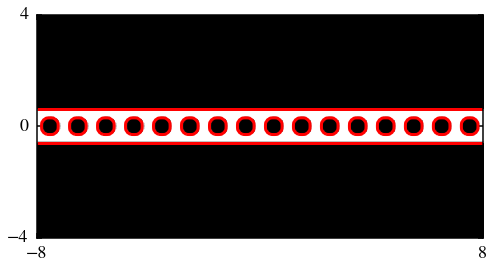

In [23]:
fig,ax = plt.subplots()
ax.imshow(epsilon, extent=(X_min,X_max, Y_min, Y_max), cmap=plt.cm.gray);
ax.contour(epsilon, [5], extent=(X_min, X_max, Y_min, Y_max), colors='r', linewidths=3);
ax.set_aspect('equal');
ax.set_xticks([X_min, X_max]);
ax.set_yticks([Y_min, 0, Y_max]);


In [24]:
ldos = pd.read_csv(output_dir+'/ldos.out', 
                   header=None, index_col=0, usecols=[1,2],
                  names=['freq', 'ldos'])
ldos = ldos[0:0.5]

In [25]:
fluxes = pd.read_csv(output_dir+'/fluxes.out',
                     header=None, index_col=0, usecols=[1,2,3,4,5],
                     names=["freq", "top", "right","bottom","left"])

fluxes=fluxes[0:0.5]

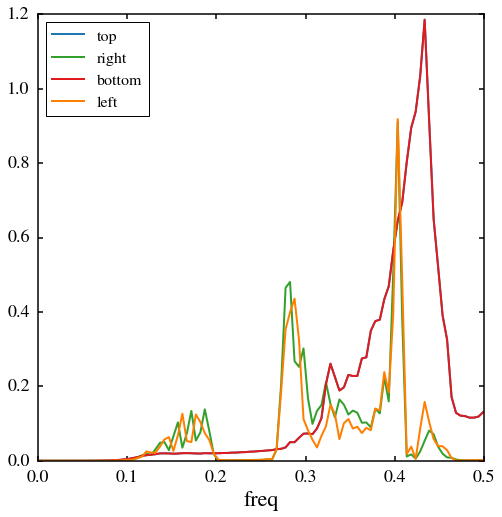

In [26]:
flx2 = np.abs(fluxes)
fig,ax = plt.subplots()
# ax.plot(fluxes, 'o-');
# ax.set_ylim(0,None);
# ax.axhline(0.25, ls='--', c='k');
flx2.plot(ax = ax);
ax.set_xlim(0,0.5);

In [27]:
ratio = (flx2["top"] + flx2["bottom"]) / (flx2.sum(axis=1))
# ratio.loc[np.isclose(flx2.sum(axis=1), 0, atol=1e-3)] = np.nan

In [28]:
np.argmax(ratio.values)

84

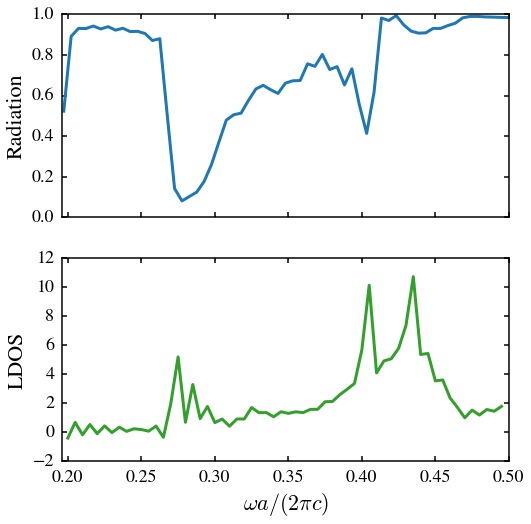

In [29]:
fig,axs = plt.subplots(2,1, sharex=True);
ax,ax1=axs

ax1.plot([0])

ratio[np.pi/sx:0.5].plot(ax=ax, lw=3);
ax.set_ylabel("Radiation");
# omega1 = flx2.iloc[np.argmax(ratio.values)].name

ldos[np.pi/sx:0.5].plot(ax=ax1, lw=3, legend=None);
ax1.set_ylabel("LDOS");
ax1.set_xlabel("$\omega a / (2 \pi c)$");

# ax.axvline(omega1, c='k', ls='--',zorder=-3);
# print(omega1);
ax.set_xlim(np.pi/sx,0.5);


---

In [ ]:
ldos = pd.read_csv(output_dir+'/ldos.out', 
                   header=None, index_col=0, usecols=[1,2],
                  names=['freq', 'ldos'])
ldos = ldos[0:0.5]

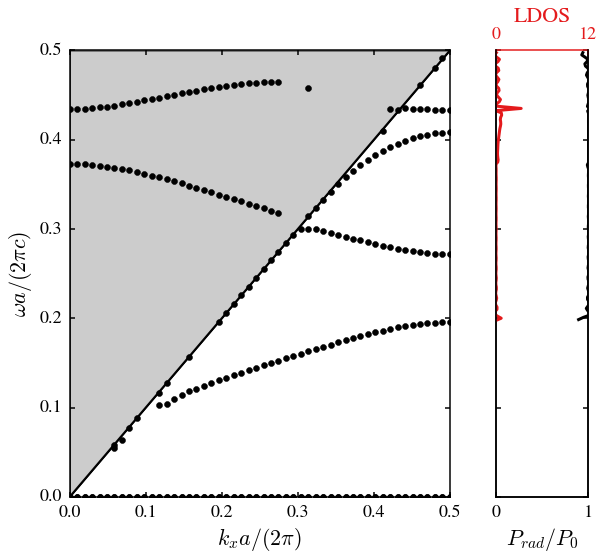

In [250]:
fig = plt.figure()
gs1 = mpl.gridspec.GridSpec(1,1)
gs1.update(left=0.05, right=0.71, wspace=0.05)
gs2 = mpl.gridspec.GridSpec(1,1)
gs2.update(left=0.79, right=0.95, wspace=0.5)

ax1 = plt.subplot(gs1[:,:])
ax2 = plt.subplot(gs2[:,:], sharey=ax1)
ax3 = ax2.twiny()
plt.setp(ax2.get_yticklabels(), visible=False)

# ratio.plot(ax=ax2, lw=3);
r = ratio[np.pi/sx:0.5]
ax2.plot(r.values, r.index, 'k', lw=3)

ax2.set_xticks([0,0.5,1]);
ax2.set_xlim(0,1);

c3 = cmap7.mpl_colors[0]
l = ldos[np.pi/sx:0.5]
ax3.plot(l.values, l.index, c=c3, lw=3)
ax3.set_xlim(0,12);
ax3.set_xticks([0,12]);
ax3.set_xlabel("LDOS");

for obj in ax3.get_xticklabels() + [ax3.spines['top'], ax3.xaxis.label] + ax3.get_xticklines():
    obj.set_color(c3)
    obj.set_zorder(2)

ax2.spines['top'].set_visible(False)
ax2.set_xticks([0,1]);
ax2.set_xlabel("$P_{rad} / P_0$");


freqs_re.plot(ax=ax1, c='k', marker='o', linestyle='', legend=None);
k0 = [0,0.5]
ax1.plot(k0,k0,c='k');
ax1.fill_betweenx(k0, k0, facecolor='#cccccc', zorder=-1);
# ax.axhline(0.4528543062578309, c='k', lw=3)
ax1.set_xlabel("$k_x a / (2 \pi)$");
ax1.set_ylabel("$\omega a / (2 \pi c)$");

---

## check field profile at optimum

In [131]:
output_dir = './out/holes/rad0/'
files = os.listdir(output_dir)
files = fnmatch.filter(files, '*-hz-*.h5')
print(len(files))

19


In [133]:
hz_min = 0
hz_max = 0

for fn in files:
    timestamp = fn.split("-")[-1][:-3]
    with h5py.File(output_dir + fn, 'r') as field_data:
        hz = field_data["hz"].value.T
        hz_min = min(hz_min, hz.min())
        hz_max = max(hz_max, hz.max())
        
hz_lim = max(abs(hz_min), abs(hz_max))
print(hz_lim)

0.0393432167593


In [134]:
fig,ax = plt.subplots(frameon=False)
ax.contour(epsilon, [5], colors='k', extent=(X_min, X_max, Y_min, Y_max))
axim = ax.imshow(epsilon, extent=(X_min,X_max, Y_min, Y_max), vmin=-hz_lim, vmax=hz_lim, cmap=plt.cm.RdBu);
ax.set_aspect('equal');
ax.xaxis.set_visible(False);
ax.yaxis.set_visible(False);
ax.axis('off');
fig.tight_layout()

ns = 1
for fn in files[::ns]:
    timestamp = fn.split("-")[-1][:-3]
    with h5py.File(output_dir + fn, 'r') as field_data:
        hz = field_data["hz"].value.T
        axim.set_data(hz)
        fig.savefig(output_dir+"_png/hz-%s.png" % timestamp, bbox_inches='tight', pad_inches=0)

        
plt.close(fig)

---

In [31]:
output_dir = './out/holes/bands/multi-k/'

In [32]:
freqs_re = pd.read_csv(output_dir+'fre.out', header=None, index_col=0, usecols=range(2,10))
freqs_im = pd.read_csv(output_dir+ 'fim.out', header=None, index_col=0, usecols=range(2,10))

ks = freqs_re.index.values

amps = pd.DataFrame( columns=['k','omega', 'amp'], dtype=np.float32)

j=0

for i,k in enumerate(ks):
    df = pd.read_csv(output_dir+'harminv%02d.out' % i, 
                     header=0, index_col=0, usecols=[1,4], 
                     skipinitialspace=True)
    
    omegas = df.index.values.astype(np.float32)
    ampls = df.loc[:,'|amp|'].values.astype(np.float32)
    
    for o,a in zip(omegas, ampls):
        amps.loc[j,'k'] = k
        amps.loc[j,'omega'] = o
        amps.loc[j,'amp'] = a
        j = j+1


In [33]:
ld = ldos.values

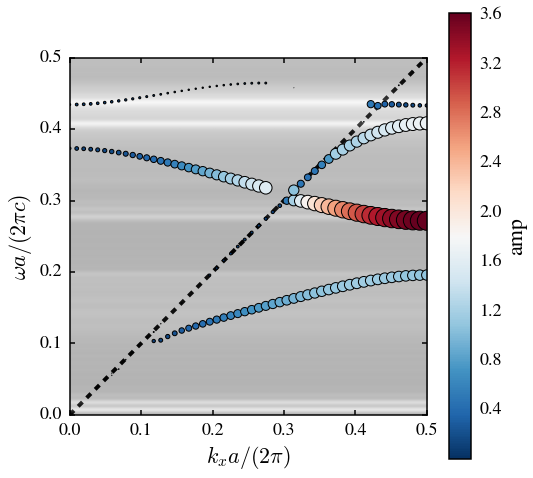

In [34]:
fig,ax = plt.subplots()
ax.plot([0,0.5],[0,0.5],'k--', lw=4,zorder=-4);
amps.plot(kind='scatter', ax=ax, 
          x='k', y='omega',
          c='amp', s=amps['amp']*100,
          cmap=plt.cm.RdBu_r,
          legend=False)
ax.set_xlim(0,0.5);
ax.set_ylim(0,0.5);
ax.set_xlabel('$k_x a / (2\pi)$');
ax.set_ylabel('$\omega a / (2\pi c)$');
ax.set_aspect('equal');
plt.imshow(ld.repeat(100,axis=1), extent=(0,0.5,0.5,0), cmap=plt.cm.gray, alpha=0.3, 
           vmin=0, vmax=10, interpolation='bicubic');


---

In [273]:
output_dir = './out/holes/bands/'

In [274]:
kfolders = os.listdir(output_dir)
kfolders = fnmatch.filter(kfolders, 'k*')
parse_k = lambda s: float(s[1:])
ks = list(map(parse_k, kfolders))

In [275]:
omegas = pd.read_csv(output_dir+kfolders[0]+'/fluxes.out',
                     header=None,  usecols=[1],
                     names=["freq"])["freq"].values

In [279]:
kpwr = pd.Panel(0,items=ks, major_axis=omegas, minor_axis=['top', 'right', 'bottom', 'left'], dtype=np.float32)
kpwr.items.set_names('k', inplace=True)
kpwr.major_axis.set_names('freq', inplace=True)

In [280]:
(kpwr.values==0).all()

True

In [281]:
for k, kf in zip(ks,kfolders):
    pwr = pd.read_csv(output_dir + kf + '/fluxes.out',
                      header=None, index_col=0, usecols=[1,2,3,4,5],
                      names=['freq', 'top','right','bottom','left'])
    
    kpwr.loc[k,:,:] = pwr.values

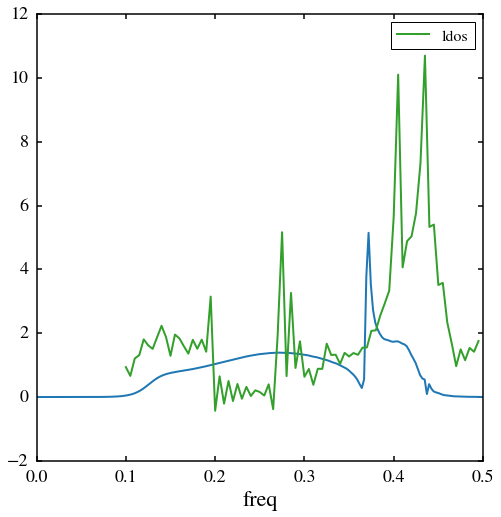

In [50]:
fig,ax = plt.subplots()
kpwr[0.05].sum(axis=1).plot(ax=ax)
ldos[0.1:0.5].plot(ax=ax)

In [226]:
output_dir = './out/holes/bands/multi-k/'

In [227]:
ldos = pd.read_csv(output_dir+'/ldos.out', 
                   header=None, index_col=0, usecols=[1,2],
                  names=['freq', 'ldos'])
ldos = ldos / eps_hi

In [228]:
fluxes = pd.read_csv(output_dir+'/fluxes.out',
                     header=None, index_col=0, usecols=[1,2,3,4,5],
                     names=["freq", "top", "right","bottom","left"])

# fluxes=fluxes[]

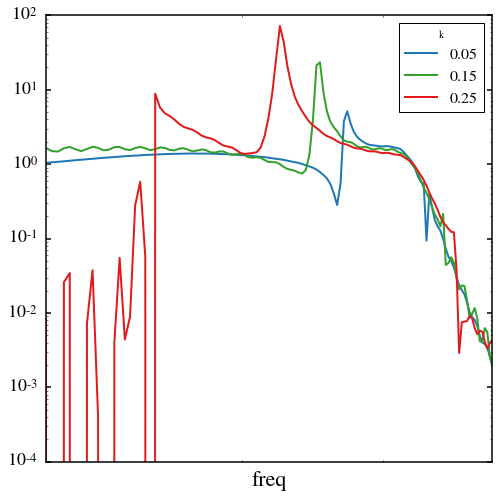

In [258]:
kpwr.loc[[0.05,0.15,0.25], 0.2:, ["top", "bottom"]].sum(axis=2).plot(loglog=True)

In [283]:
kpwr_all = kpwr.sum(axis=2)
pwr_w = kpwr_all.sum(axis=1)[::2]

In [213]:
import scipy.ndimage as ndi

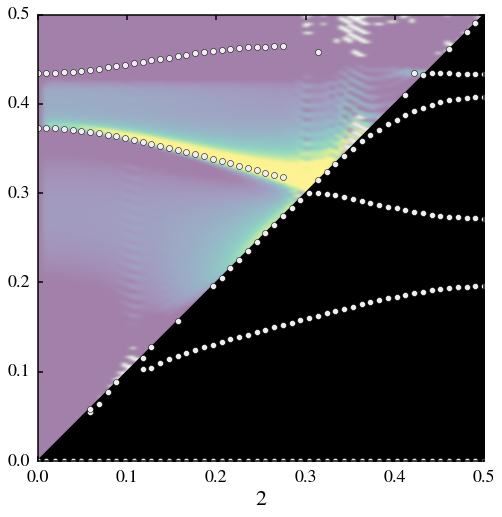

In [294]:
fig,ax = plt.subplots()
plt.imshow(np.log(ndi.median_filter(kpwr_all,2)), extent=(0,0.5,0.5,0), 
           cmap=plt.cm.viridis, vmin=0, vmax=2, 
           alpha=0.5, interpolation='bicubic');
k0 = [0,0.5]
ax.plot(k0,k0,'k-');
ax.fill_betweenx(k0, k0, 0.5, facecolor='#000000', zorder=1);
ax.set_xlim(0,0.5);
ax.set_ylim(0,0.5);
freqs_re.plot(ax=ax, c='#eeeeee', marker='o', linestyle='', legend=None);

---

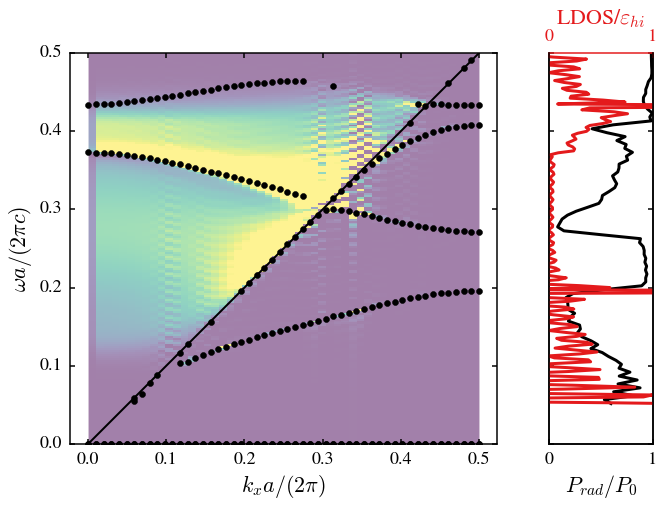

In [164]:
fig = plt.figure(figsize=(9,7))

gs1 = mpl.gridspec.GridSpec(1,1)
gs1.update(left=0.05, right=0.71, wspace=0.05)
gs2 = mpl.gridspec.GridSpec(1,1)
gs2.update(left=0.79, right=0.95, wspace=0.5)

ax1 = plt.subplot(gs1[:,:])
ax2 = plt.subplot(gs2[:,:], sharey=ax1)
ax3 = ax2.twiny()
plt.setp(ax2.get_yticklabels(), visible=False)

# ratio.plot(ax=ax2, lw=3);
r = ratio[0.05:0.5]
ax2.plot(r.values, r.index, 'k', lw=3)

ax2.set_xticks([0,0.5,1]);
ax2.set_xlim(0,1);

c3 = cmap7.mpl_colors[0]
l = ldos[0.05:0.5]
ax3.plot(l.values, l.index, c=c3, lw=3)
ax3.set_xlim(0,1);
ax3.set_xticks([0,1]);
ax3.set_xlabel("LDOS/"r"$\varepsilon_{hi}$");

for obj in ax3.get_xticklabels() + [ax3.spines['top'], ax3.xaxis.label] + ax3.get_xticklines():
    obj.set_color(c3)
    obj.set_zorder(2)

ax2.spines['top'].set_visible(False)
ax2.set_xticks([0,1]);
ax2.set_xlabel("$P_{rad} / P_0$");


freqs_re.plot(ax=ax1, c='k', marker='o', linestyle='', legend=None);
k0 = [0,0.5]
ax1.plot(k0,k0,c='k');
# ax1.fill_betweenx(k0, k0, facecolor='#cccccc', zorder=-1);
ax1.imshow(kpwr.sum(2), extent=(0,0.5,0.5,0), cmap=plt.cm.viridis, vmin=0, vmax=2, alpha=0.5)
ax1.set_ylim(0,0.5);
ax1.set_xlim(0,0.5);
ax1.set_aspect('equal');
# ax.axhline(0.4528543062578309, c='k', lw=3)
ax1.set_xlabel("$k_x a / (2 \pi)$");
ax1.set_ylabel("$\omega a / (2 \pi c)$");